Вариант 14

Каждый студент получает выборку из 20 чисел. Необходимо определить следующие статистические характеристики: вариационный ряд, экстремальные значения и размах, оценки математического ожидания и среднеквадратического отклонения, эмпирическую функцию распределения и её график, гистограмму и полигон приведенных частот группированной выборки. Для расчета характеристик и построения графиков нужно написать программу на одном из языков программирования. Листинг программы и результаты работы должны быть представлены в отчете по практической работе.

[отчет](https://docs.google.com/document/d/1Y8dwnTG5xWrAzQTY-8pb2Mz45KDDbfHDKk1fwUhx-gI/edit)

In [44]:
import math
import matplotlib.pyplot

data = [
    -0.53, -0.93, 0.48, -1.55, -1.34, -0.04, -0.84, 0.57, 0.76, 0.30,
    -0.87, -0.41, 0.81, -1.42, -0.61, -0.33, -1.33, 0.62, -0.48, -0.35
]

print("Исходные данные:\n", data)
data.sort()
print("Вариационный ряд:\n", data)
print("Первая порядковая статистика:", data[0])
print("n-я порядковая статистика:", data[-1])
print("размах выборки:", '%.2f' % (data[-1] - data[0]))

uniq_data = list(set(data))
uniq_data.sort()
num_uniq_occur = []
prob_uniq = []

for i in uniq_data:
   num_uniq_occur.append(data.count(i))
   prob_uniq.append(num_uniq_occur[-1] / len(data))
print("Статистический ряд:", num_uniq_occur)

M = 0
for i in range(len(uniq_data)):
   M += uniq_data[i] * prob_uniq[i]
print("Оценка математического ожидания:",'%.2f' %  M)

D = -1 * M**2
for i in range(len(uniq_data)):
   D += uniq_data[i]**2 * prob_uniq[i]
print("Дисперсия:", '%.2f' % D)
print(f"Выборочная дисперсия:", '%.2f' % (len(data) * D / (len(data) - 1)))
print("Оценка среднеквадратического отклонения:", '%.2f' % math.sqrt(D))
print(f"Выборочное среднеквадратичное отклонение:", '%.2f' % math.sqrt(len(data) * D / (len(data) - 1)))

Исходные данные:
 [-0.53, -0.93, 0.48, -1.55, -1.34, -0.04, -0.84, 0.57, 0.76, 0.3, -0.87, -0.41, 0.81, -1.42, -0.61, -0.33, -1.33, 0.62, -0.48, -0.35]
Вариационный ряд:
 [-1.55, -1.42, -1.34, -1.33, -0.93, -0.87, -0.84, -0.61, -0.53, -0.48, -0.41, -0.35, -0.33, -0.04, 0.3, 0.48, 0.57, 0.62, 0.76, 0.81]
Первая порядковая статистика: -1.55
n-я порядковая статистика: 0.81
размах выборки: 2.36
Статистический ряд: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Оценка математического ожидания: -0.37
Дисперсия: 0.55
Выборочная дисперсия: 0.58
Оценка среднеквадратического отклонения: 0.74
Выборочное среднеквадратичное отклонение: 0.76


In [45]:
print("Функция F:")
F = [0]
print(F[-1], "\t\t для x <=", uniq_data[0])
for i in range(1, len(uniq_data)):
   F.append(F[-1]+prob_uniq[i-1])
   print('%.2f' % F[-1], "\t для", uniq_data[i-1], "< x <=", uniq_data[i])
F.append(1)
print(F[-1], "\t\t для", uniq_data[-1], "< x")

Функция F:
0 		 для x <= -1.55
0.05 	 для -1.55 < x <= -1.42
0.10 	 для -1.42 < x <= -1.34
0.15 	 для -1.34 < x <= -1.33
0.20 	 для -1.33 < x <= -0.93
0.25 	 для -0.93 < x <= -0.87
0.30 	 для -0.87 < x <= -0.84
0.35 	 для -0.84 < x <= -0.61
0.40 	 для -0.61 < x <= -0.53
0.45 	 для -0.53 < x <= -0.48
0.50 	 для -0.48 < x <= -0.41
0.55 	 для -0.41 < x <= -0.35
0.60 	 для -0.35 < x <= -0.33
0.65 	 для -0.33 < x <= -0.04
0.70 	 для -0.04 < x <= 0.3
0.75 	 для 0.3 < x <= 0.48
0.80 	 для 0.48 < x <= 0.57
0.85 	 для 0.57 < x <= 0.62
0.90 	 для 0.62 < x <= 0.76
0.95 	 для 0.76 < x <= 0.81
1 		 для 0.81 < x


In [46]:
print("Интервальный статистический ряд:")
dx = round((uniq_data[-1] - uniq_data[0]) / math.ceil(1+math.log(20, 2)), 2)
start = uniq_data[0] - dx/2
finish = start + dx
arr1 = []
arr2 = []
_value = 0
for i in range(len(uniq_data)):
   if uniq_data[i] < finish:
       _value += num_uniq_occur[i]
   else:
       arr1.append((start+finish)/2)
       arr2.append(_value / len(data))
       print("[", '%.2f' % start, ",", '%.2f' % finish, "):\tчастота:", _value, "частотность:", '%.2f' % arr2[-1])
       _value = num_uniq_occur[i]
       start = finish
       finish = start + dx
print("[", '%.2f' % start, ",", '%.2f' % finish, "):\tчастота:", _value, "частотность:", '%.2f' % arr2[-1])


x, y = [uniq_data[0]-0.5], [0]
_pointer = 0
for i in uniq_data:
   x.append(uniq_data[_pointer])
   x.append(uniq_data[_pointer])
   y.append(F[_pointer])
   y.append(F[_pointer+1])
   _pointer+=1
x.append(uniq_data[-1]+0.5)
y.append(1)

Интервальный статистический ряд:
[ -1.75 , -1.35 ):	частота: 2 частотность: 0.10
[ -1.35 , -0.96 ):	частота: 2 частотность: 0.10
[ -0.96 , -0.57 ):	частота: 4 частотность: 0.20
[ -0.57 , -0.18 ):	частота: 5 частотность: 0.25
[ -0.18 , 0.21 ):	частота: 1 частотность: 0.05
[ 0.21 , 0.60 ):	частота: 3 частотность: 0.15
[ 0.60 , 0.99 ):	частота: 3 частотность: 0.15


График эмперической функции:


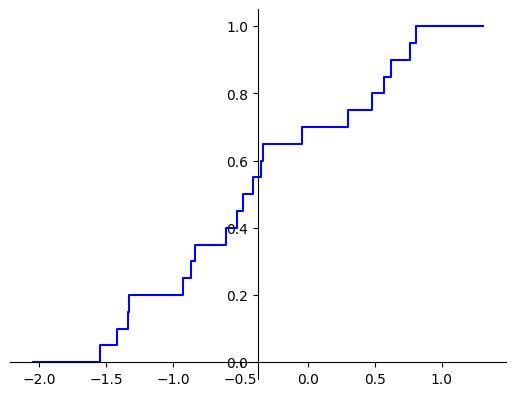

In [47]:
print('График эмперической функции:')
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
matplotlib.pyplot.plot(x, y, 'b')
matplotlib.pyplot.show()

Гистограмма:


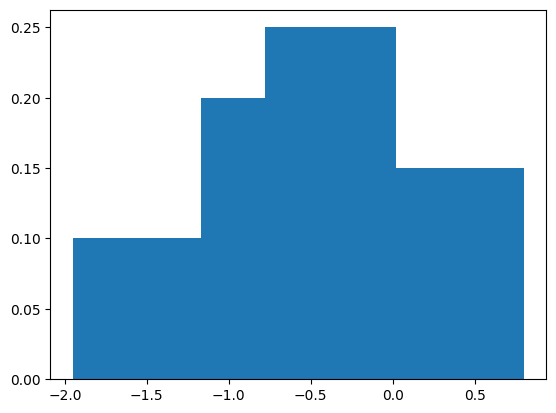

In [48]:
print('Гистограмма:')
matplotlib.pyplot.bar(arr1, arr2)
matplotlib.pyplot.show()